In [22]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pandas as pd
import stanhelper
from ipywidgets import interactive
from bayeshelper import linear_model

def df2dict(df):
    return {'x': df.x, 'y': df.y, 'N': df.x.size}

(<matplotlib.figure.Figure at 0x1208de150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120a75710>)

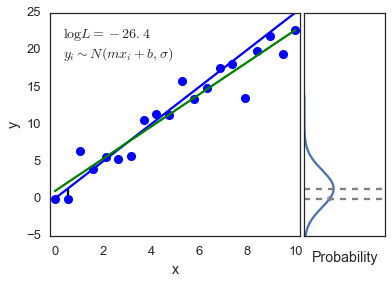

In [23]:
interactive(linear_model, alpha=0, beta=(0.1, 5, 0.1), sigma=(0.1, 5, 0.1), pt=(1, 19, 1), N=20, )

In [24]:
# fig, ax = linear_model(alpha=0, beta=2.5, sigma=3, N=15, pt=7)
# a = fig.axes[0]
# line = a.lines[0]
# x,y = line.get_data()
# x2, y2 = a.lines[1].get_data()
# plt.plot(x, y, 'bo')
# plt.plot(x2, y2, 'b-')

In [25]:
# fig.savefig('linear-fit.png', dpi=300, bbox_inches='tight')
# df = pd.DataFrame({'x': x, 'y': y})
# df.to_csv('linear.csv')

In [26]:
df = pd.read_csv('linear.csv', index_col=0)

In [27]:
model_code="""
data {
int N;
vector[N] x;
vector[N] y;
}
parameters {
real m;
real b;
real<lower=0> sigma;
}
model {
sigma ~ exponential(5);
m ~ normal(0, 10);
b ~ normal(0, 5);

y ~ normal(m * x + b, sigma);
}"""

In [28]:
sm = pystan.StanModel(model_code=model_code)

In [29]:
out = sm.sampling(data=df2dict(df), chains=4, iter=10000)

/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an 

In [30]:
out

Inference for Stan model: anon_model_8e623bb5a99c883e87c9e5f5ad03c107.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
m       2.31  1.3e-3   0.18   1.95   2.19   2.31   2.44   2.67  20000    1.0
b        0.6  7.5e-3   1.06  -1.47   -0.1    0.6    1.3    2.7  20000    1.0
sigma   2.22  2.1e-3    0.3   1.72   2.01   2.19   2.41   2.89  20000    1.0
lp__  -34.86  9.0e-3   1.27 -38.18 -35.41 -34.53 -33.95 -33.44  20000    1.0

Samples were drawn using NUTS(diag_e) at Tue Feb 16 14:00:08 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

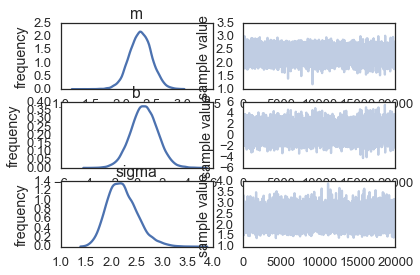

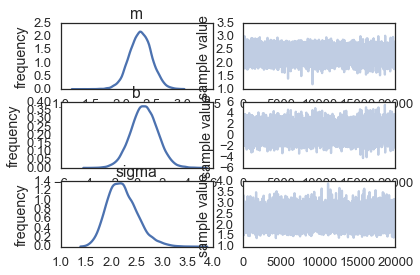

In [31]:
out.traceplot()

In [32]:
samples = out.extract()

In [34]:
mu = np.zeros((samples['m'].size, df.x.size))
for i in xrange(samples['m'].size):
    mu[i] = samples['m'][i]*df.x + samples['b'][i]
mu_p = lambda p: np.percentile(mu, p, axis=0)
mb = np.polyfit(df.x, df.y, 1)

In [60]:
# for i in np.random.randint(samples['m'].size, size=20):
#     plt.plot(df.x, mu[i], 'k', alpha=0.2)
# plt.plot(df.x, df.y, 'bo', markeredgewidth=0, markersize=6, zorder=10)
# plt.plot(df.x, np.polyval(mb, df.x), 'g--')
# # plt.fill_between(df.x, mu_p(10), mu_p(90), color='g', alpha=0.2, zorder=0)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.savefig('bayes-linear.pdf')

(<matplotlib.figure.Figure at 0x11f1dc210>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fd3b450>)

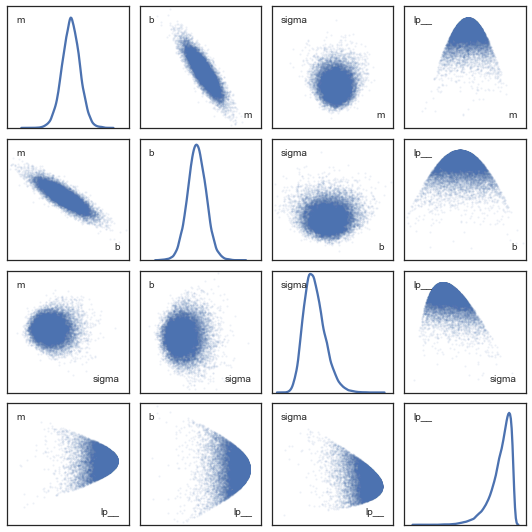

In [18]:
stanhelper.plot_all_traces(samples)